In [21]:
path = "../logs/"

def read_log(file):
    temp = None
    with open(path + file, "r") as f:
        temp = eval(f.read())
    return temp
    
roberta = read_log("log_robert.txt")
codebert = read_log("log_codebert.txt")
unllama = read_log("unllama.txt")
llama = read_log("llama.txt")
uncodellama = read_log("uncodellama.txt")
codellama = read_log("codellama.txt")
t5_small_clf = read_log("t5-small.txt")
codet5_small_clf = read_log("codet5-small.txt")
t5_base_clf = read_log("t5-base.txt")
codet5_base_clf = read_log("codet5-base.txt")

t5_small_clf_conll = read_log("t5-small-conll.txt")
codet5_small_clf_conll = read_log("codet5-small-conll.txt")

type_loss = "loss"

In [8]:
def get_losses(dct, type_loss, cut):
    steps = [entry['step'] for entry in dct if type_loss in entry][:cut]
    losses = [entry[type_loss] for entry in dct if type_loss in entry][:cut]
    return steps, losses

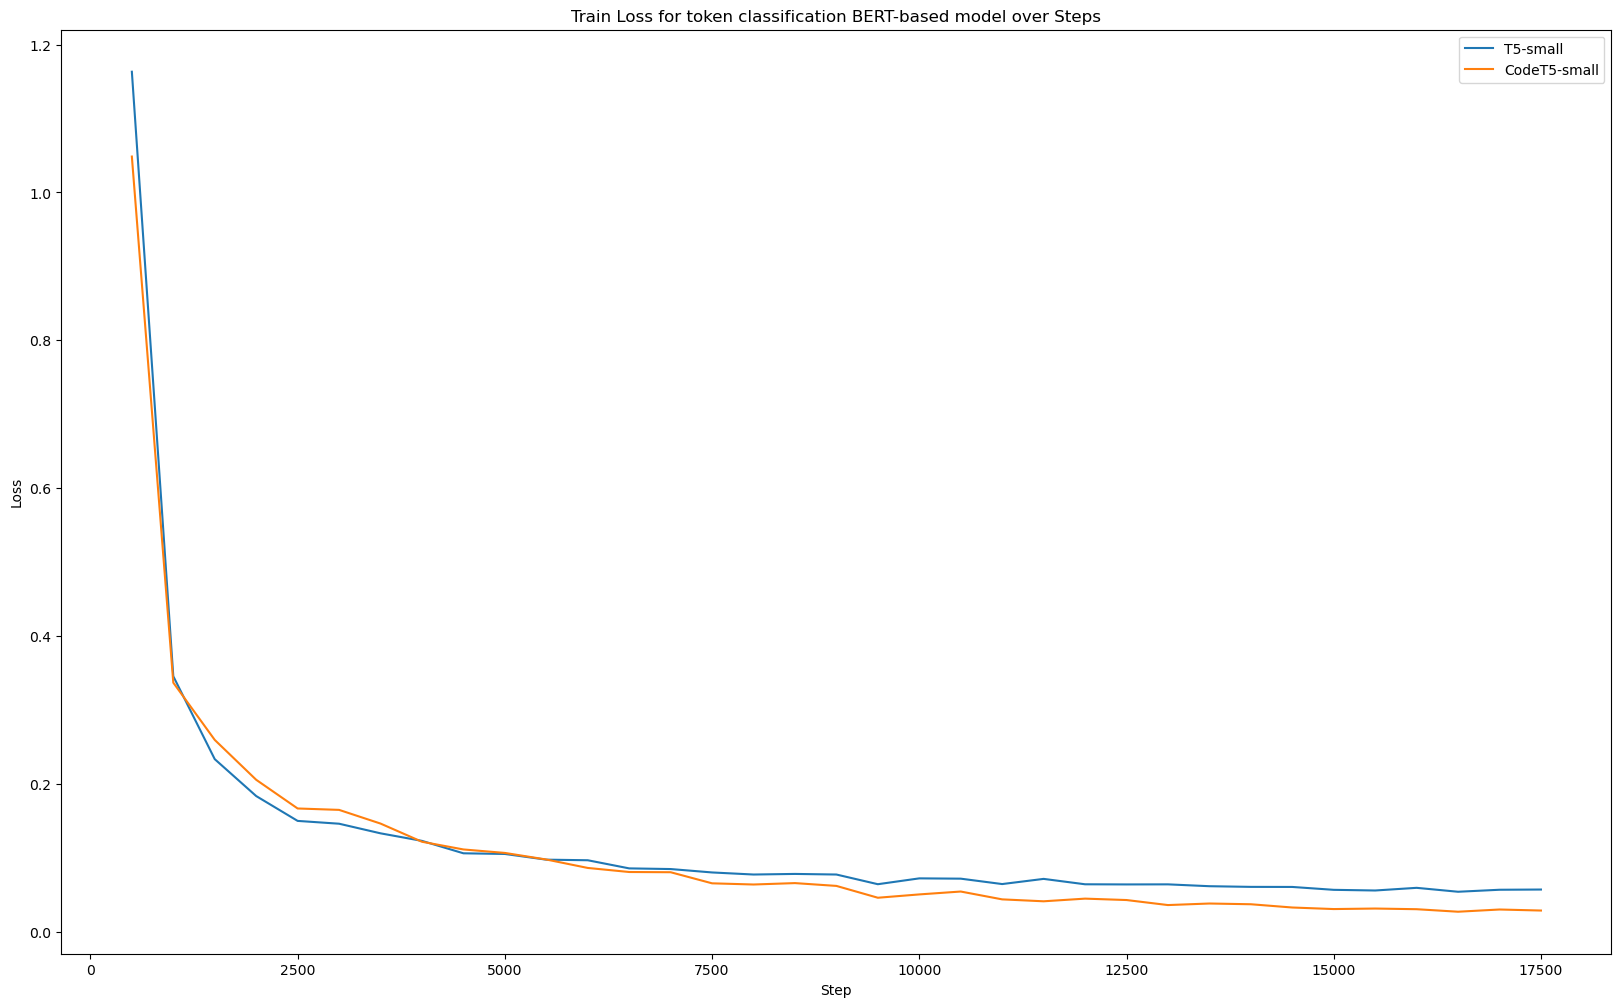

In [9]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 12))
cut = None

steps, losses = get_losses(t5_small_clf_conll, type_loss, cut)
plt.plot(steps, losses, linestyle='-',  label="T5-small")

steps, losses = get_losses(codet5_small_clf_conll, type_loss, cut)
plt.plot(steps, losses, linestyle='-', label="CodeT5-small")

plt.title('Train Loss for token classification BERT-based model over Steps')
plt.legend()
plt.xlabel('Step')
plt.ylabel('Loss')
plt.grid(False)
plt.show()

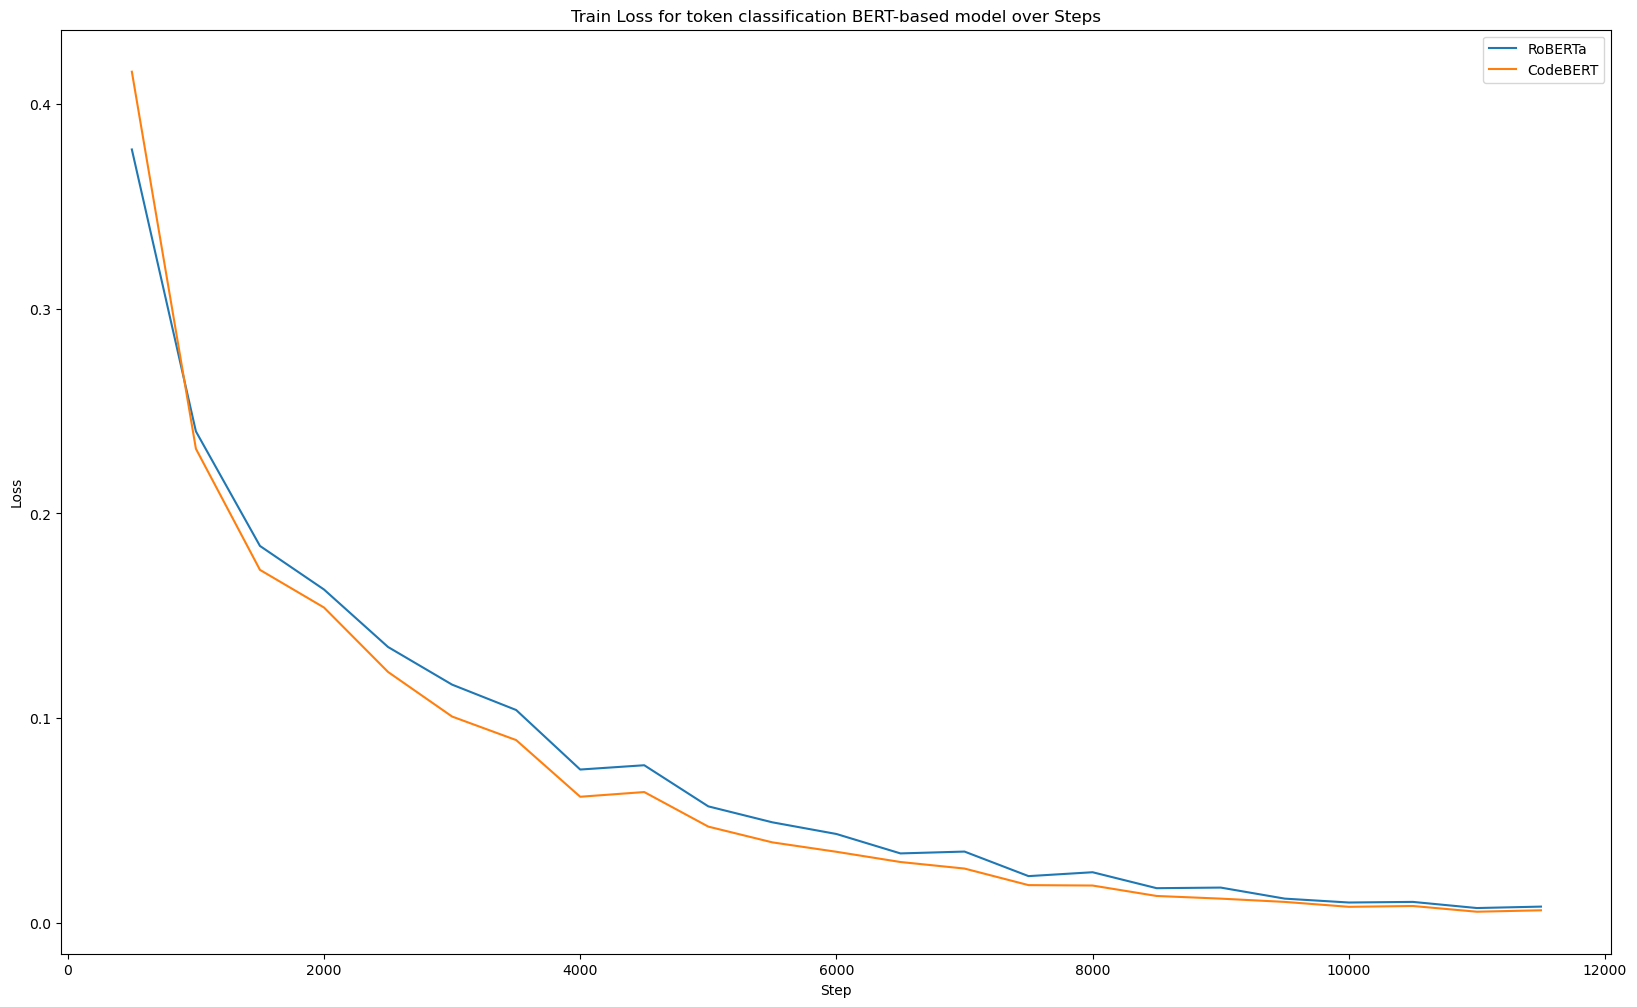

In [10]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 12))
cut = None

steps, losses = get_losses(roberta, type_loss, cut)
plt.plot(steps, losses, linestyle='-',  label="RoBERTa")

steps, losses = get_losses(codebert, type_loss, cut)
plt.plot(steps, losses, linestyle='-', label="CodeBERT")

plt.title('Train Loss for token classification BERT-based model over Steps')
plt.legend()
plt.xlabel('Step')
plt.ylabel('Loss')
plt.grid(False)
plt.show()

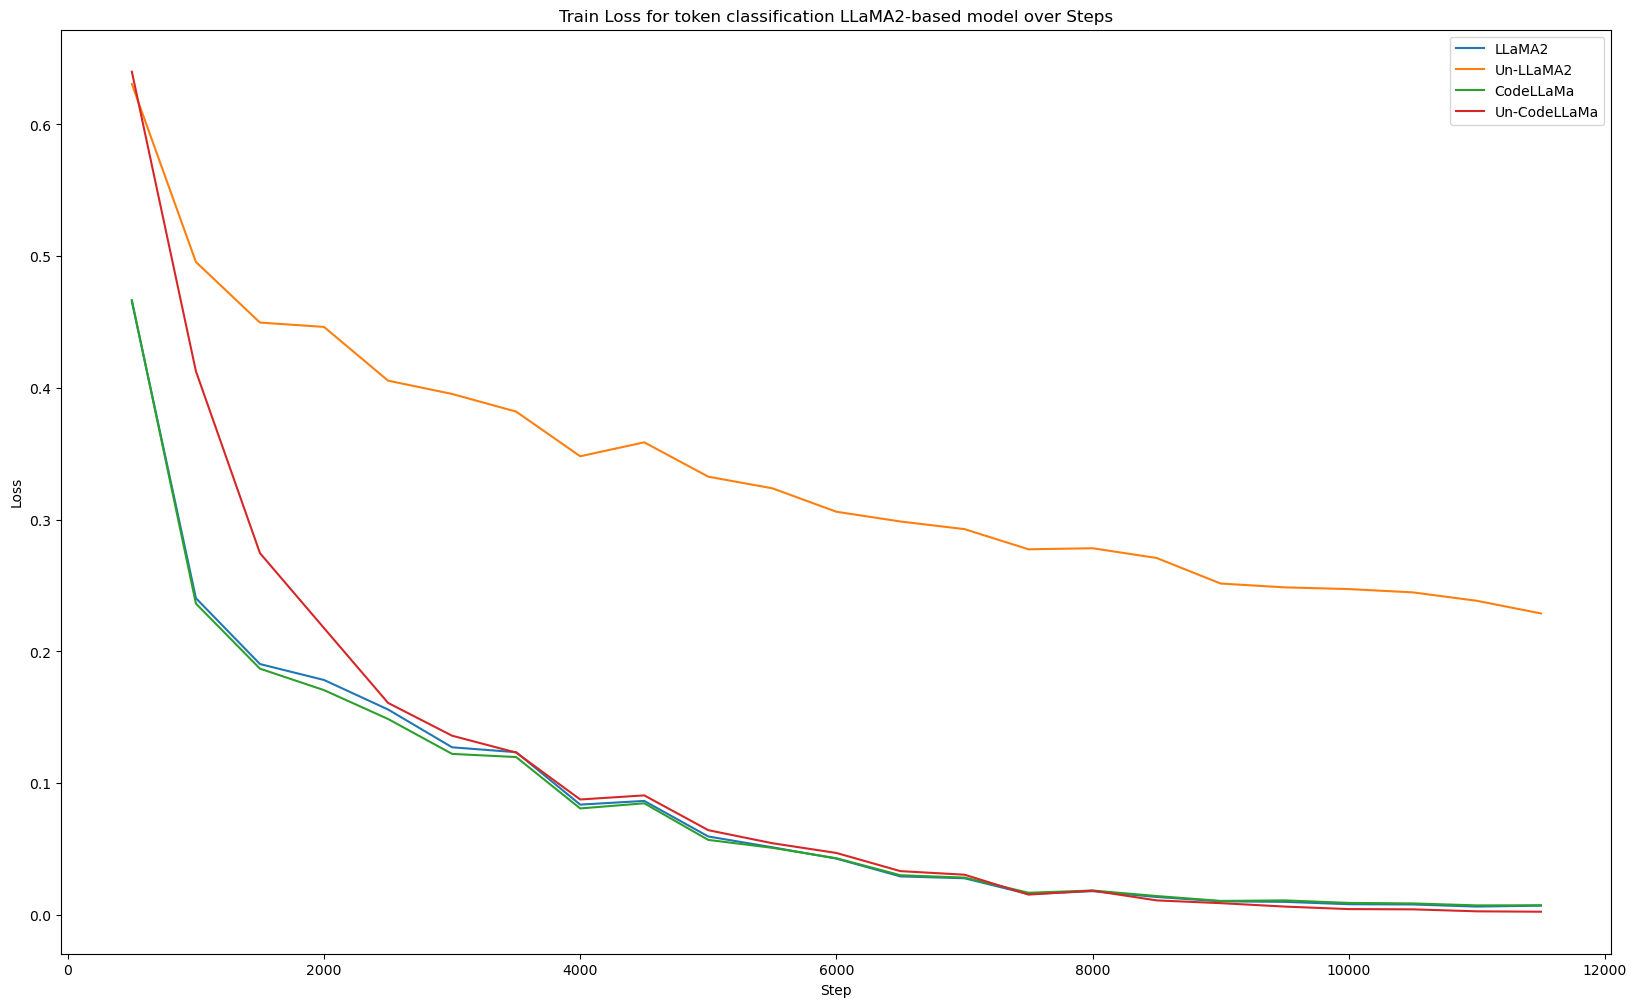

In [22]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 12))
cut = None

steps, losses = get_losses(llama, type_loss, cut)
plt.plot(steps, losses, linestyle='-',  label="LLaMA2")

steps, losses = get_losses(unllama, type_loss, cut)
plt.plot(steps, losses, linestyle='-', label="Un-LLaMA2")

steps, losses = get_losses(codellama, type_loss, cut)
plt.plot(steps, losses, linestyle='-',  label="CodeLLaMa")

steps, losses = get_losses(uncodellama, type_loss, cut)
plt.plot(steps, losses, linestyle='-', label="Un-CodeLLaMa")

plt.title('Train Loss for token classification LLaMA2-based model over Steps')
plt.legend()
plt.xlabel('Step')
plt.ylabel('Loss')
plt.grid(False)
plt.show()

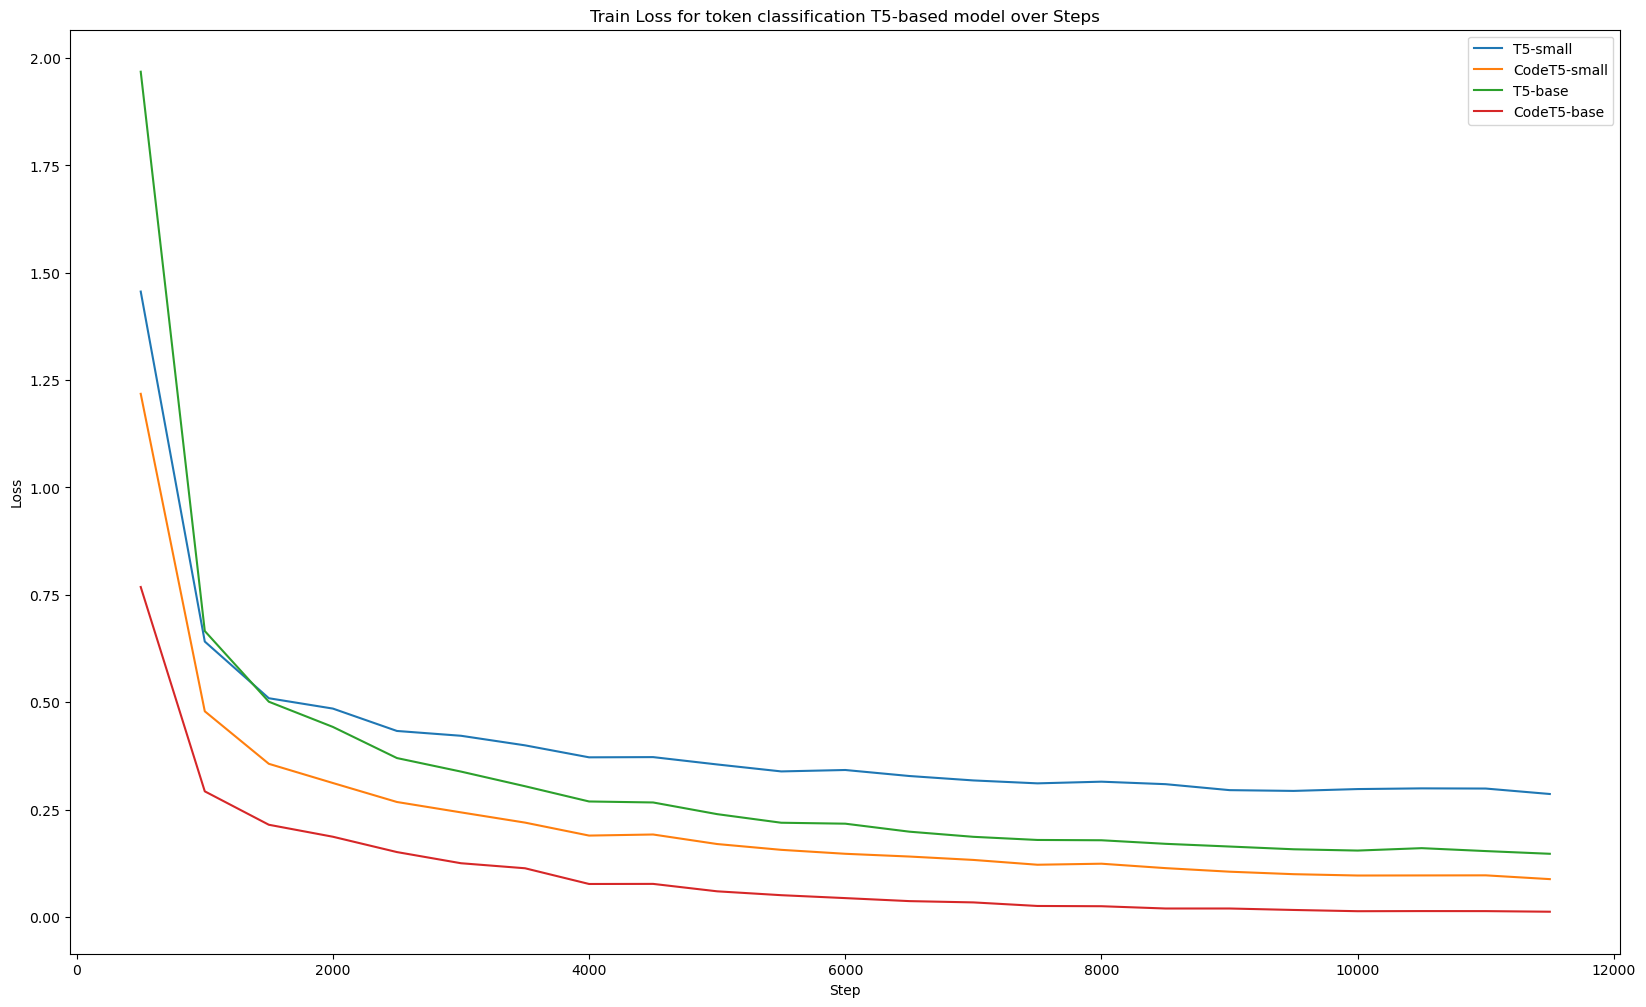

In [12]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 12))
cut = None

steps, losses = get_losses(t5_small_clf, type_loss, cut)
plt.plot(steps, losses, linestyle='-',  label="T5-small")

steps, losses = get_losses(codet5_small_clf, type_loss, cut)
plt.plot(steps, losses, linestyle='-', label="CodeT5-small")

steps, losses = get_losses(t5_base_clf, type_loss, cut)
plt.plot(steps, losses, linestyle='-',  label="T5-base")

steps, losses = get_losses(codet5_base_clf, type_loss, cut)
plt.plot(steps, losses, linestyle='-', label="CodeT5-base")

plt.title('Train Loss for token classification T5-based model over Steps')
plt.legend()
plt.xlabel('Step')
plt.ylabel('Loss')
plt.grid(False)
plt.show()

In [16]:
import pandas as pd
import numpy as np

t5_small_t2t = pd.read_csv(path + "t5-small-t2t.csv")
codet5_small_t2t = pd.read_csv(path + "codet5-small-t2t.csv")
t5_base_t2t = pd.read_csv(path + "t5-base-t2t.csv")
codet5_base_t2t = pd.read_csv(path + "codet5-base-t2t.csv")

type_loss = "train_loss_epoch" #"train_loss_step"
# type_loss = "val_loss_epoch" #"val_loss_step"

In [17]:
def get_losses_csv(pd_file, type_loss):
    losses = list(pd_file[~pd_file[type_loss].isna()][type_loss])
    steps = list(pd_file[~pd_file[type_loss].isna()]["step"])
    return steps, losses

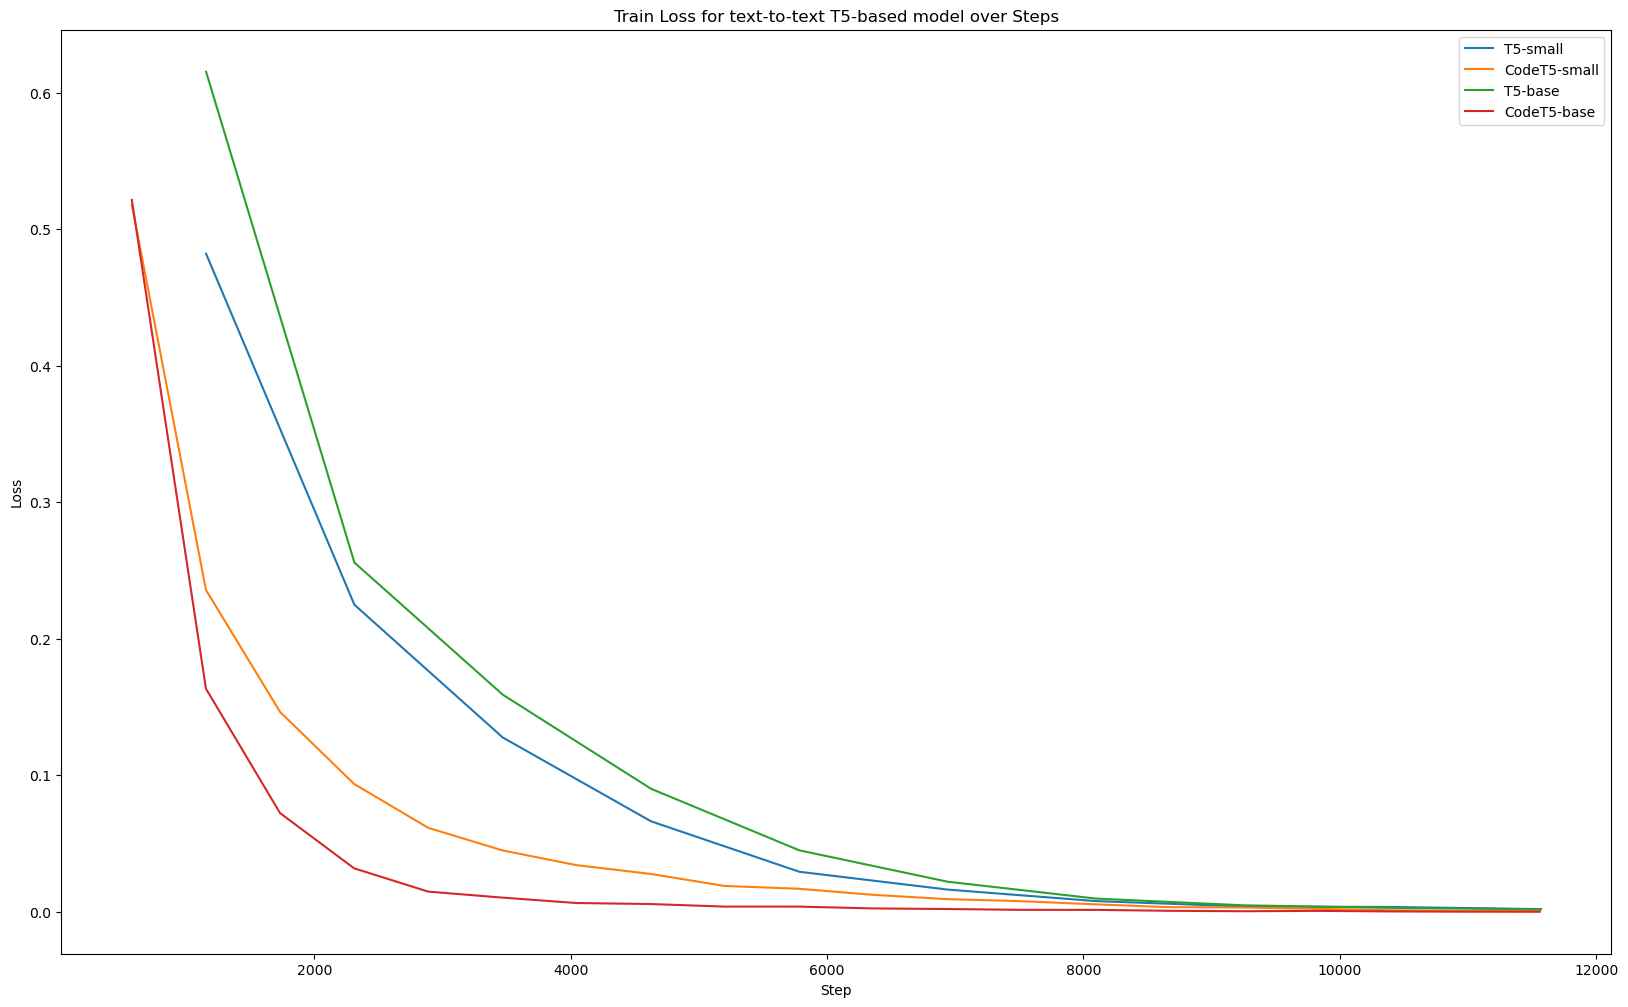

In [18]:
import matplotlib.pyplot as plt
plt.figure(figsize=(20, 12))
cut = None

steps, losses = get_losses_csv(t5_small_t2t, type_loss)
plt.plot(steps, losses, linestyle='-',  label="T5-small")

steps, losses = get_losses_csv(codet5_small_t2t, type_loss)
plt.plot(steps, losses, linestyle='-',  label="CodeT5-small")

steps, losses = get_losses_csv(t5_base_t2t, type_loss) 
plt.plot(steps, losses, linestyle='-',  label="T5-base")

steps, losses = get_losses_csv(codet5_base_t2t, type_loss)
plt.plot(steps, losses, linestyle='-',  label="CodeT5-base")

plt.title('Train Loss for text-to-text T5-based model over Steps')
plt.legend()
plt.xlabel('Step')
plt.ylabel('Loss')
plt.grid(False)
plt.show()